In [13]:
import sys
sys.path.append('..')
import ugent

In [105]:
from strands import Schrodinger2D, Rectangle, Circle
import numpy as np
import math

c = 26

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5),
                  gridSize=(90, 90), maxBasisSize=40)
extremely_accurate = s.eigenvalues(60, shiftInvert=True, tolerance=1e-14)[:c]
extremely_accurate

[3.195918085200221,
 5.5267438743949935,
 5.5267438743950015,
 7.557803326786432,
 8.031272340314343,
 8.444581361569952,
 9.92806105695181,
 9.9280610569519,
 11.31181705061845,
 11.311817050618503,
 12.103253578718533,
 12.201178967971334,
 13.332331271155363,
 14.348268533252742,
 14.348268533252835,
 14.450478721981396,
 14.580556315644001,
 16.151419224567647,
 16.15141922456779,
 16.517192463374123,
 16.56487192590949,
 17.894578279407312,
 17.8945782794074,
 18.583391734468027,
 18.75620427361067,
 18.756204273610678]

In [15]:
muls = []
iss = []
l = []
i = 0
for e in extremely_accurate:
    r = f"{e:.12f}"
    if not l or r != l[-1]:
        iss.append(i)
        l.append(r)
        muls.append(1)
    else:
        muls[-1] += 1
    i += 1

In [16]:
for i, E, m in zip(iss, l, muls):
    left = " = ".join(f"E_{{{i + k}}}" for k in range(m))
    print(f"${left} =$ & {E}")

$E_{0} =$ & 3.195918085200
$E_{1} = E_{2} =$ & 5.526743874395
$E_{3} =$ & 7.557803326786
$E_{4} =$ & 8.031272340314
$E_{5} =$ & 8.444581361570
$E_{6} = E_{7} =$ & 9.928061056952
$E_{8} =$ & 11.311817050618
$E_{9} =$ & 11.311817050619
$E_{10} =$ & 12.103253578719
$E_{11} =$ & 12.201178967971
$E_{12} =$ & 13.332331271155
$E_{13} = E_{14} =$ & 14.348268533253
$E_{15} =$ & 14.450478721981
$E_{16} =$ & 14.580556315644
$E_{17} = E_{18} =$ & 16.151419224568
$E_{19} =$ & 16.517192463374
$E_{20} =$ & 16.564871925909
$E_{21} = E_{22} =$ & 17.894578279407
$E_{23} =$ & 18.583391734468
$E_{24} = E_{25} =$ & 18.756204273611


In [17]:
reported = np.array([3.1959181, 5.5267439, 5.5267439, 7.5578033, 8.0312723, 8.4445814, 9.9280611, 9.9280611, 11.3118171, 11.3118171, 12.1032536, 12.2011790, 13.3323313])

(reported - np.array(extremely_accurate)[:len(reported)])*10**8

array([ 1.47997792,  2.56050061,  2.56049981, -2.67864326, -4.03143439,
        3.84300485,  4.30481908,  4.30481002,  4.93815513,  4.9381498 ,
        2.12814673,  3.20286659,  2.88446369])

In [18]:
from tqdm import tqdm
from itertools import product

data = {}

ks = [10, 20, 35]
ns = [20, 35, 50]
for k, n in tqdm(list(product(ks, ns))):
    s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5),
                      gridSize=(n, n), maxBasisSize=k)
    data[(n, k)] = np.array(s.eigenvalues(c+10, tolerance=1e-12, shiftInvert=True)[:c])

100%|████████████████████████████| 9/9 [00:09<00:00,  1.06s/it]


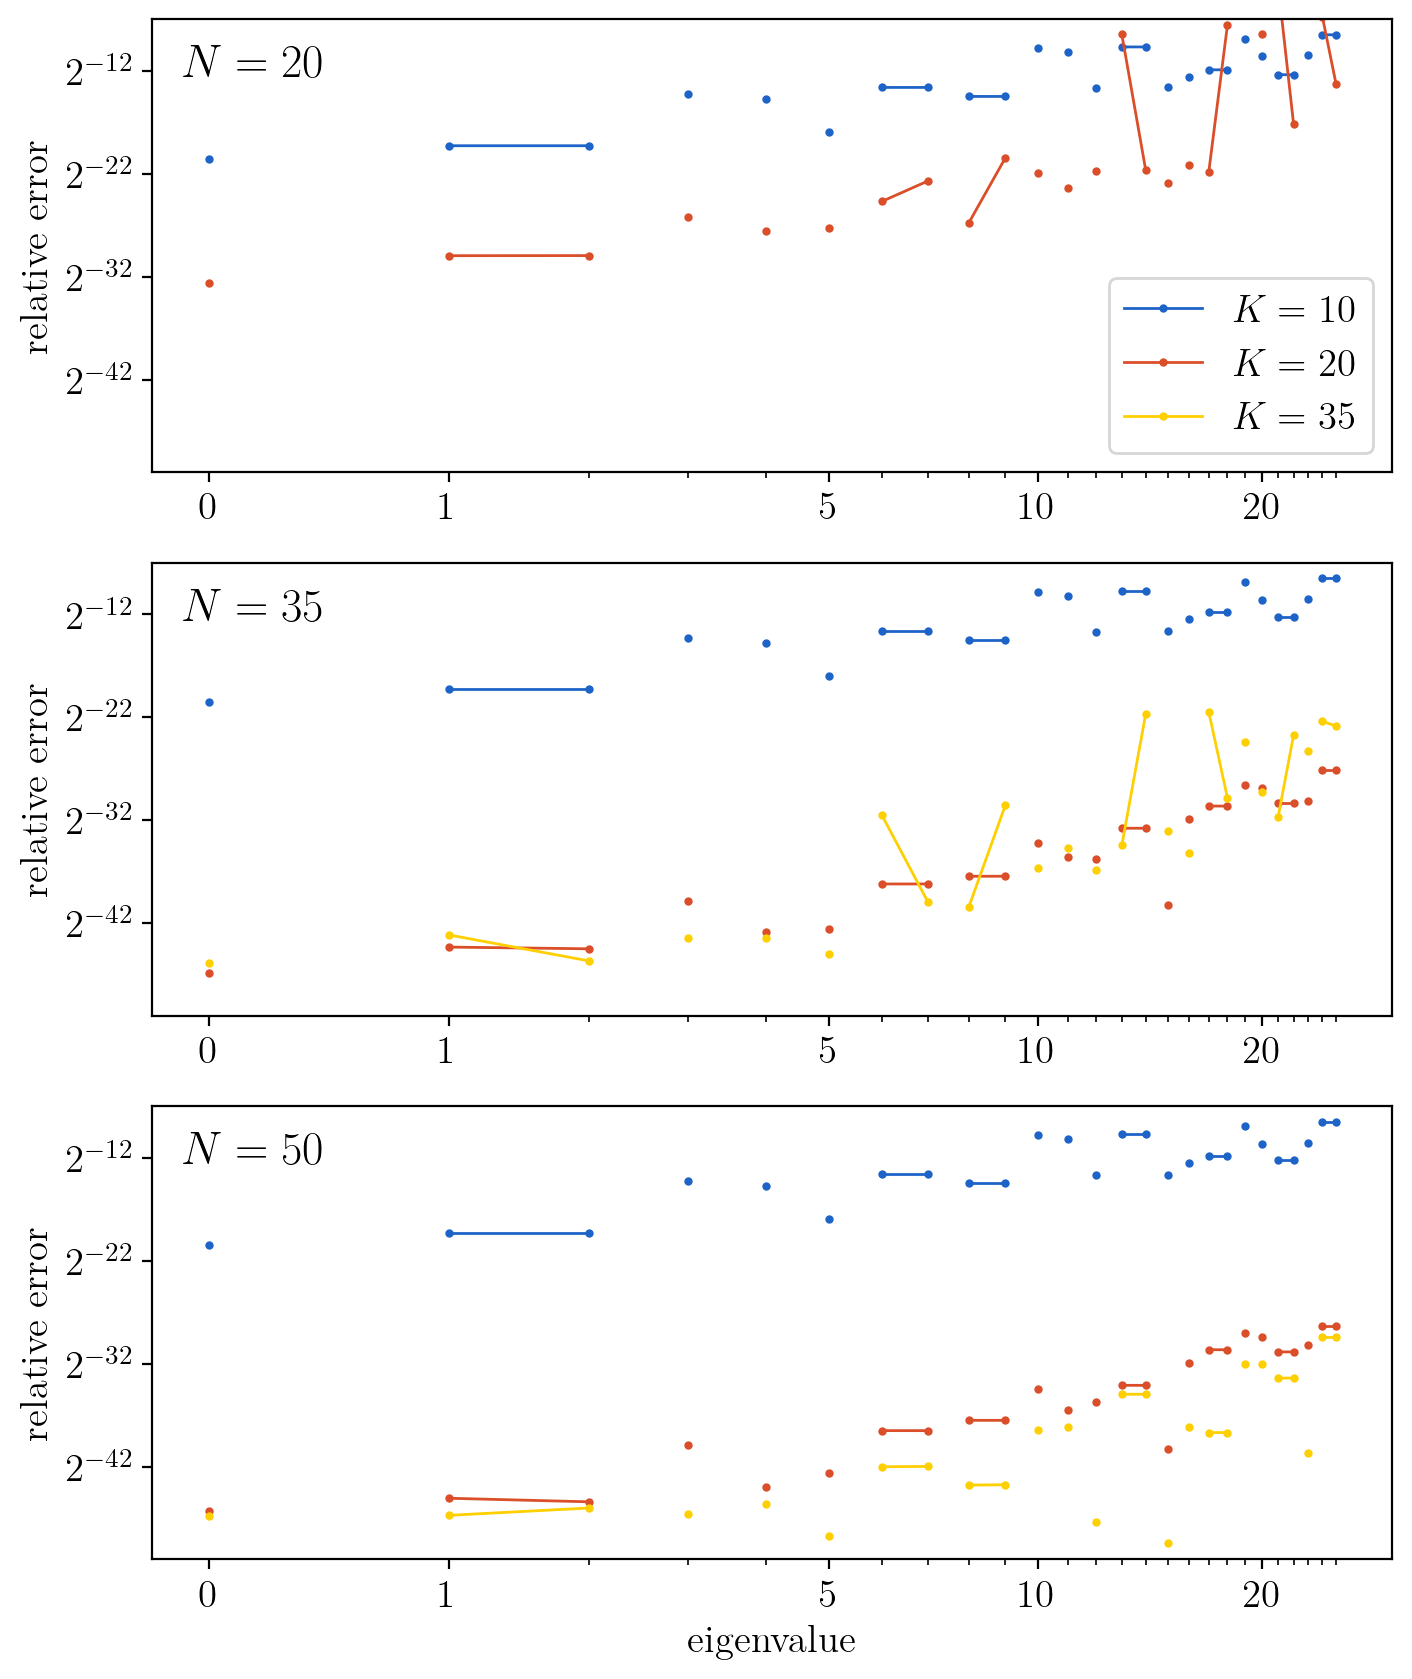

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FormatStrFormatter, ScalarFormatter


fig, axes = plt.subplots(3, 1, figsize=(8, 10), dpi=200)

mults = [1]
for i in range(1, c):
    if abs(extremely_accurate[i-1] - extremely_accurate[i]) < 1e-8:
        mults[-1] += 1
    else:
        mults.append(1)

for ni, n in enumerate(ns):
    ax = axes[ni]
    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=2)
    xticks = [1, 2, 6, 11, 21]
    ax.set_xticks(xticks, labels=[f"{x-1}" for x in xticks])
    ax.set_xticks(range(1, 27), labels=[], minor=True)
    ax.set_ylim(2**-51, 2**-7)
    ax.set_ylabel("relative error")
    if ni == 2:
        ax.set_xlabel("eigenvalue")

    for i, k in enumerate(ks):
        if k > n:
            continue
        j = 0
        r = np.abs((data[(n, k)] - extremely_accurate)/extremely_accurate)
        kwargs = dict(
            label=f"$K={k}$",
            color=ugent.palet[i],
            marker='.', ls='-', lw=1, markersize=4,
        )
        for mult in mults:
            d = r[j:j+mult]
            ax.plot(range(j + 1, j+len(d)+1), d, **kwargs)
            if j == 0:
                del kwargs["label"]
            j += mult
            if j >= len(r):
                break

    ax.set_title(f"$N = {n}$", y=0.835, x=0.025, loc="left")


axes[0].legend(*axes[2].get_legend_handles_labels(), loc="lower right")
    
fig.show()
plt.savefig(f"nm_test_ixaru.pdf", bbox_inches="tight")

In [21]:
np.log2(10**-8)

-26.575424759098897

In [22]:
s = Schrodinger2D(V, Rectangle(-8,8, -8,8),
              gridSize=(50, 50), maxBasisSize=25)

In [23]:
s.eigenvalues(20)

[3.195918085200219,
 5.526743874390778,
 5.526743874390788,
 7.557803326670593,
 8.03127234013033,
 8.444581361566057,
 9.928061054185385,
 9.928061054185791,
 11.311817049607003,
 11.311817049607162,
 12.103253537280771,
 12.201178918304548,
 13.332331270434915,
 14.348267989537646,
 14.348267989542896,
 14.45047872171042,
 14.580556251680532,
 16.15141917312771,
 16.151419173131092,
 16.51718745336991]

In [121]:
from strands import Schrodinger2D, Rectangle

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5),
                  gridSize=(60, 60), maxBasisSize=40)

efs = list(enumerate(s.eigenfunctions(30, shiftInvert=True)))

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4), dpi=200, sharey=True)

xs = np.linspace(-5.5,5.5, 1000)
X, Y = np.meshgrid(xs, xs)

for j, (i, (E, f)) in enumerate(efs[23:26]):
    ax = axes[j]
    ax.set_aspect(1)
    ax.set_xticks([-5, 0, 5])
    ax.set_yticks([-5, 0, 5])
    Z = f(X, Y)
    Z /= np.max(np.abs(Z))
    Z = np.sign(Z) * np.power(np.abs(Z), 0.75)
    ax.pcolormesh(X, Y, Z, shading="gouraud", cmap=ugent.RdBu, vmin=-1, vmax=1)

# axes[1].set_title(f"$E_{{24}} = E_{{25}} = {efs[25][1][0]:.9f}$")
plt.figtext(.24, .77,f"$E_{{23}} = {efs[23][1][0]:.9f}$", va="center", ha="center", size=16)
plt.figtext(.64, .77,f"$E_{{24}} = E_{{25}} = {efs[25][1][0]:.9f}$", va="center", ha="center", size=16)

plt.savefig(f"nm_ixaru_eigenfunctions.png", bbox_inches="tight", dpi=800)
plt.show()

In [116]:
from strands import Schrodinger2D, Rectangle

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

ixaru = Schrodinger2D(V, Rectangle(-5.5, 5.5, -5.5, 5.5),
                      gridSize=(40, 40), maxBasisSize=30)
print(ixaru.eigenvalues(13))

[3.195918085200188, 5.526743874394994, 5.526743874395007, 7.557803326786216, 8.03127234031395, 8.444581361570002, 9.928061056946508, 9.92806105694652, 11.311817050616696, 11.31181705061676, 12.103253578639059, 12.201178967875828, 13.332331271155393]


In [117]:
(reported - np.array(ixaru.eigenvalues(13)))*10**8

array([ 1.4799812 ,  2.56050052,  2.56049928, -2.67862159, -4.03139513,
        3.84299987,  4.30534932,  4.30534808,  4.93833046,  4.93832406,
        2.13609415,  3.21241718,  2.88446067])

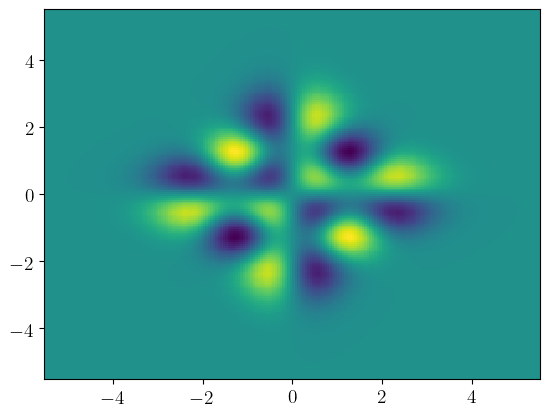

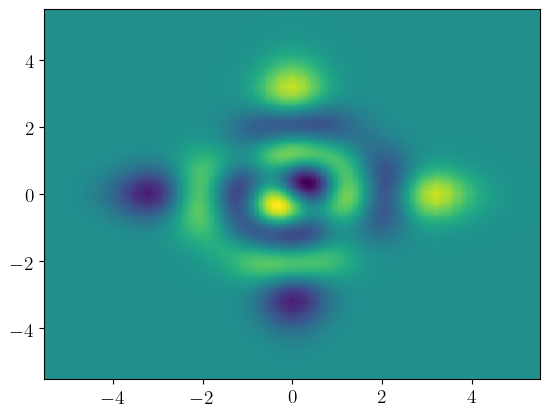

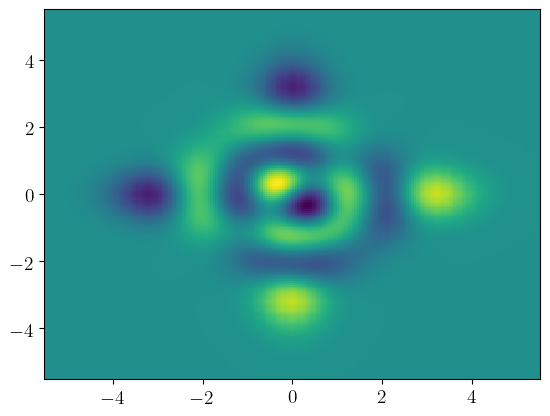

In [148]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-5.5, 5.5, 200)
ys = np.linspace(-5.5, 5.5, 200)
X, Y = np.meshgrid(xs, ys)

for E, f in ixaru.eigenfunctions(26)[23:]:
    plt.pcolormesh(X, Y, f(X, Y))
    plt.show()

In [145]:
from strands import Schrodinger2D, Rectangle
from tqdm import tqdm
import time

def V(x, y):
    return (x**2 + 1) * (y**2 + 1)

a = []
for _ in tqdm(range(10)):
    t = time.time()
    s = Schrodinger2D(V, Rectangle(-5.5,5.5, -5.5,5.5),
                      gridSize=(50, 50), maxBasisSize=35)
    s.eigenvalues(26)
    a.append(time.time() - t)
np.average(a)

100%|██████████████████████████| 10/10 [00:22<00:00,  2.29s/it]


2.2857521772384644